In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import time
# defining global variable path
train_path = r"C:/Users/mayan/Desktop/frames"
# test_path = "Downloads/test"
def loadImages(path):
    # Put files into lists and return them as one list of size 4
    image_files = sorted([os.path.join(path, file)
         for file in os.listdir(path) if file.endswith('.jpg')]) 
    return image_files

c:\programdata\anaconda3\envs\gpu_tf\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [3]:
start=time.time()
train=loadImages(train_path)
# test=loadImages(test_path)

View image

In [4]:
len(train)

19718

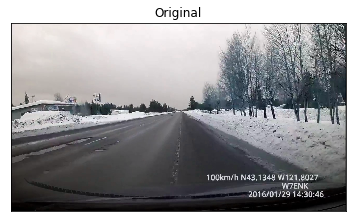

In [5]:
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()

img = cv2.imread(train[2], cv2.IMREAD_UNCHANGED)
display_one(img)

Preprocessing


In [6]:
def processing(data):
    # loading image
    # Getting 3 images to work with 
    img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data]
    return img
#     # --------------------------------
#     # setting dim of the resize
#     height = 50
#     width = 50
#     dim = (width, height)
#     res_img = []
#     for i in range(len(img)):
#         res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
#         res_img.append(res)
#     return res_img
#     #gray = [cv2.cvtColor(i, cv2.COLOR_RGB2GRAY) for i in res_img]
#     no_noise = []
#     for i in range(len(gray)):
#         blur = cv2.GaussianBlur(gray[i], (5, 5), 0)
#         no_noise.append(blur)
#     #return no_noise

In [7]:
path=r"C:/Users/mayan/Desktop/frames/frame"
train=[]
for i in range(100,851):
    img=cv2.imread(path+str(i)+".jpg", cv2.IMREAD_UNCHANGED)
    if(i%50==0):
        print(i)
#     cv2.imshow(img)
    train.append(img)

100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850


In [40]:
# img=cv2.imread(path+str(i)+".jpg", cv2.IMREAD_UNCHANGED)
# img=cv2.imread(r"C:/Users/mayan/Desktop/frames/frame100.jpg", cv2.IMREAD_UNCHANGED)


In [41]:
# img

In [8]:
train[0]

array([[[ 17,  23,  22],
        [ 17,  23,  22],
        [ 18,  24,  23],
        ...,
        [141, 135, 128],
        [ 97,  91,  84],
        [ 81,  75,  68]],

       [[ 17,  23,  22],
        [ 17,  23,  22],
        [ 18,  24,  23],
        ...,
        [207, 201, 194],
        [157, 151, 144],
        [138, 132, 125]],

       [[ 18,  23,  22],
        [ 18,  23,  22],
        [ 19,  24,  23],
        ...,
        [226, 220, 213],
        [166, 160, 153],
        [135, 129, 122]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 49,  45,  44],
        [ 44,  40,  39],
        [ 40,  36,  35]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 42,  38,  37],
        [ 37,  33,  32],
        [ 33,  29,  28]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 34,  30,  29],
        [ 28,  24,  23],
        [ 24,  20,  19]]

In [9]:
# print(start)
# train_x = processing(train)
# # # test_x = processing(test)
# # display_one(train_x[2])
# print(time.time()-start)
len(train)

751

In [10]:
train_x=np.array(train)

In [11]:
train_x[0]

array([[[ 17,  23,  22],
        [ 17,  23,  22],
        [ 18,  24,  23],
        ...,
        [141, 135, 128],
        [ 97,  91,  84],
        [ 81,  75,  68]],

       [[ 17,  23,  22],
        [ 17,  23,  22],
        [ 18,  24,  23],
        ...,
        [207, 201, 194],
        [157, 151, 144],
        [138, 132, 125]],

       [[ 18,  23,  22],
        [ 18,  23,  22],
        [ 19,  24,  23],
        ...,
        [226, 220, 213],
        [166, 160, 153],
        [135, 129, 122]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 49,  45,  44],
        [ 44,  40,  39],
        [ 40,  36,  35]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 42,  38,  37],
        [ 37,  33,  32],
        [ 33,  29,  28]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 34,  30,  29],
        [ 28,  24,  23],
        [ 24,  20,  19]]

In [12]:
import numpy
numpy.version.version

'1.15.4'

HOG

In [13]:
from skimage.feature import hog
from skimage import data, color, exposure

hog_features=[]
def hog_img(image):
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(10, 10),cells_per_block=(2, 2),visualize=True,block_norm='L2')
    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, out_range=(0,0.5))
    hog_features.append(fd)
    return hog_image_rescaled

In [14]:
# len(hog_features)
hog_features=[]
def hog_img(image):
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(10, 10),cells_per_block=(2, 2),visualize=True,block_norm='L2')
    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, out_range=(0,0.5))
    hog_features.append(fd)
    return hog_image_rescaled

In [23]:

img=cv2.imread(r"C:/Users/mayan/Desktop/train/2p.jpg", cv2.IMREAD_UNCHANGED)

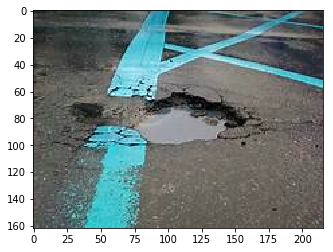

In [25]:
plt.imshow(img)

In [20]:
x=hog_img(img)

In [ ]:
train_hog=[]
for i in range(len(train_x)):
    train_hog.append(hog_img(train_x[i]))
    if(i%50==0):
        print(i)
print(time.time()-start)
# test_hog=[hog_img(i) for i in test_x]

0
50
100
150


In [21]:
def ShowDiff(original,hoged):
    fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

    ax[0].axis('off')
    ax[0].imshow(original, cmap=plt.cm.gray)
    ax[0].set_title('Input image')
    ax[0].set_adjustable('box-forced')
    ax[1].axis('off')
    ax[1].imshow(hoged, cmap=plt.cm.gray)
    ax[1].set_title('Histogram of Oriented Gradients')
    ax[1].set_adjustable('box-forced')

    plt.show()

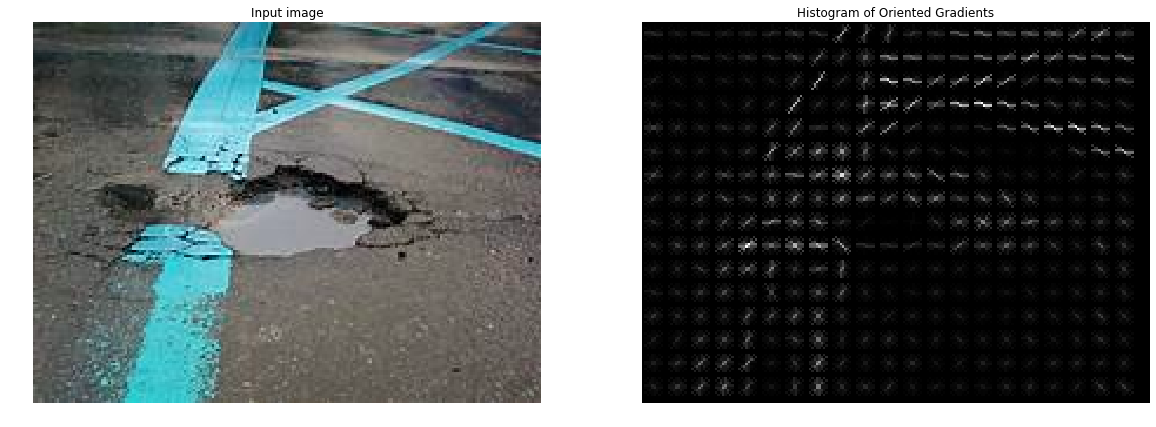

In [26]:
ShowDiff(img,x)

Importing labels

In [14]:
import pandas as pd
labels=pd.read_csv(r'C:/Users/mayan/Desktop/trainLabels.csv')

In [15]:
labels.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [16]:
labels['label']=pd.factorize(labels['label'])[0]

In [17]:
my_labels=list(labels['label'])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hog_features, my_labels, random_state=42)

PCA 

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(X_train)
test_img = scaler.transform(X_test)


In [20]:
len(train_img[0])

128

In [21]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(train_img)
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [22]:
len(train_img[0])

128

In [23]:
len(train_img)

37500

In [24]:
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
clf = svm.SVC()
clf.fit(train_img,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [25]:
y_pred = clf.predict(test_img)

In [26]:
from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred,average="weighted")

In [34]:
f1

0.09767844712601285